<a href="https://colab.research.google.com/github/nindaa24/Case-Study-03-Data-Mining-Kelompok-3/blob/main/Case_Study_03_Data_Mining_UIN_Ganjil_2022_Kelompok%223%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings; warnings.simplefilter('ignore')

try:
    import google.colab; IN_COLAB = True
    print("Installing the required modules")
    !pip install --upgrade umap-learn
    !wget https://raw.githubusercontent.com/nindaa24/Case-Study-03-Data-Mining-Kelompok-3/main/case-study-03.csv
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")


Installing the required modules
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2022-10-26 05:33:47--  https://raw.githubusercontent.com/nindaa24/Case-Study-03-Data-Mining-Kelompok-3/main/case-study-03.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3185 (3.1K) [text/plain]
Saving to: ‘case-study-03.csv.6’

case-study-03.csv.6 100%[===================>]   3.11K  --.-KB/s    in 0s      

2022-10-26 05:33:47 (36.6 MB/s) - ‘case-study-03.csv.6’ saved [3185/3185]



In [2]:

import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from itertools import combinations
from collections import Counter
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import networkx as nx

%matplotlib inline
plt.style.use('bmh'); sns.set()

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/nindaa24/Case-Study-03-Data-Mining-Kelompok-3/main/case-study-03.csv')
df

,ID_Transaksi,Tanggal,Konsumen,ID_Produk,Nama_Produk,Merek,Jumlah
0,1,7/1/2022 0:00,Mr. A,1,Roti,Sri Roti,2
1,1,7/1/2022 0:00,Mr. A,2,Air Minum,Aquos,1
2,1,7/1/2022 0:00,Mr. A,11,Mie Instan,Indomi,2
3,1,7/1/2022 0:00,Mr. A,12,Mie Instan,Mi Sedap,1
4,2,7/1/2022 0:00,Mr. B,2,Air Minum,Aquos,1
5,2,7/1/2022 0:00,Mr. B,6,Snack,Chiki,2
6,2,7/1/2022 0:00,Mr. B,3,Roti,Prambanan,1
7,2,7/1/2022 0:00,Mr. B,5,Shampoo,Clean,1
8,3,7/2/2022 0:00,Mr. C,4,Sabun,Lifboy,1
9,3,7/2/2022 0:00,Mr. C,5,Shampoo,Clean,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID_Transaksi  56 non-null     int64 
 1   Tanggal       56 non-null     object
 2   Konsumen      56 non-null     object
 3   ID_Produk     56 non-null     int64 
 4   Nama_Produk   56 non-null     object
 5   Merek         56 non-null     object
 6   Jumlah        56 non-null     int64 
dtypes: int64(3), object(4)
memory usage: 3.2+ KB


Terlihat bahwa terdapat beberapa kesalahan pada tipe data. Setelah kami periksa, ternyata pada kolom 'Tanggal' masih bertipe data object, yang seharusnya 'Tanggal' bertipe data datetime. Pada kolom 'ID Transaksi' masih bertipe data integer seharusnya string. Pada kolom 'Konsumen' masih bertipe data object seharusnya category. Pada kolom 'Nama_Produk' masih bertipe data object seharusnya category. Pada kolom 'Merek' masih bertipe data object seharusnya category. 

In [5]:
df['Tanggal']=pd.to_datetime(df['Tanggal'])
df['ID_Transaksi'] = df['ID_Transaksi'] .astype('str')
df['Konsumen'] = df['Konsumen'] .astype('category')
df['Nama_Produk'] = df['Nama_Produk'] .astype('category')
df['Merek'] = df['Merek'] .astype('category')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID_Transaksi  56 non-null     object        
 1   Tanggal       56 non-null     datetime64[ns]
 2   Konsumen      56 non-null     category      
 3   ID_Produk     56 non-null     int64         
 4   Nama_Produk   56 non-null     category      
 5   Merek         56 non-null     category      
 6   Jumlah        56 non-null     int64         
dtypes: category(3), datetime64[ns](1), int64(2), object(1)
memory usage: 3.2+ KB


In [7]:
df.isnull().sum()

ID_Transaksi    0
Tanggal         0
Konsumen        0
ID_Produk       0
Nama_Produk     0
Merek           0
Jumlah          0
dtype: int64

Terlihat bahwa sudah tidak terdapat lagi missing value dari data.

In [8]:
df.duplicated().sum()

0

Terlihat bahwa sudah tidak ada duplikasi pada data.

### Lakukan Grouping data pada setiap konsumen

In [9]:
grouped_konsumen= df.groupby(['Konsumen'])
konsumen_Mr_A = grouped_konsumen.get_group('Mr. A')
konsumen_Mr_A.head()

,ID_Transaksi,Tanggal,Konsumen,ID_Produk,Nama_Produk,Merek,Jumlah
0,1,2022-07-01,Mr. A,1,Roti,Sri Roti,2
1,1,2022-07-01,Mr. A,2,Air Minum,Aquos,1
2,1,2022-07-01,Mr. A,11,Mie Instan,Indomi,2
3,1,2022-07-01,Mr. A,12,Mie Instan,Mi Sedap,1
16,5,2022-07-03,Mr. A,6,Snack,Chiki,1


In [10]:
grouped_konsumen= df.groupby(['Konsumen'])
konsumen_Mr_B = grouped_konsumen.get_group('Mr. B')
konsumen_Mr_B.head()

,ID_Transaksi,Tanggal,Konsumen,ID_Produk,Nama_Produk,Merek,Jumlah
4,2,2022-07-01,Mr. B,2,Air Minum,Aquos,1
5,2,2022-07-01,Mr. B,6,Snack,Chiki,2
6,2,2022-07-01,Mr. B,3,Roti,Prambanan,1
7,2,2022-07-01,Mr. B,5,Shampoo,Clean,1
11,4,2022-07-02,Mr. B,1,Roti,Sri Roti,2


In [11]:
grouped_konsumen= df.groupby(['Konsumen'])
konsumen_Mr_C = grouped_konsumen.get_group('Mr. C')
konsumen_Mr_C.head()

,ID_Transaksi,Tanggal,Konsumen,ID_Produk,Nama_Produk,Merek,Jumlah
8,3,2022-07-02,Mr. C,4,Sabun,Lifboy,1
9,3,2022-07-02,Mr. C,5,Shampoo,Clean,1
10,3,2022-07-02,Mr. C,9,Rokok,Malioboro,1


In [12]:
grouped_konsumen= df.groupby(['Konsumen'])
konsumen_Mr_D = grouped_konsumen.get_group('Mr. D')
konsumen_Mr_D.head()

,ID_Transaksi,Tanggal,Konsumen,ID_Produk,Nama_Produk,Merek,Jumlah
18,6,2022-07-03,Mr. D,11,Mie Instan,Indomi,2
19,6,2022-07-03,Mr. D,4,Sabun,Lifboy,1
20,6,2022-07-03,Mr. D,5,Shampoo,Clean,1


In [13]:
grouped_konsumen= df.groupby(['Konsumen'])
konsumen_Mr_F = grouped_konsumen.get_group('Mr. F')
konsumen_Mr_F.head()

,ID_Transaksi,Tanggal,Konsumen,ID_Produk,Nama_Produk,Merek,Jumlah
48,15,2022-07-08,Mr. F,9,Rokok,Malioboro,1


In [14]:
grouped_konsumen= df.groupby(['Konsumen'])
konsumen_Mr_G = grouped_konsumen.get_group('Mr. G')
konsumen_Mr_G.head()

,ID_Transaksi,Tanggal,Konsumen,ID_Produk,Nama_Produk,Merek,Jumlah
38,12,2022-07-06,Mr. G,4,Sabun,Lifboy,2
39,12,2022-07-06,Mr. G,5,Shampoo,Clean,1
40,12,2022-07-06,Mr. G,12,Mie Instan,Mi Sedap,2
41,12,2022-07-06,Mr. G,11,Mie Instan,Indomi,1


In [15]:
grouped_konsumen= df.groupby(['Konsumen'])
konsumen_Mr_J = grouped_konsumen.get_group('Mr. J')
konsumen_Mr_J.head()

,ID_Transaksi,Tanggal,Konsumen,ID_Produk,Nama_Produk,Merek,Jumlah
49,16,2022-08-02,Mr. J,2,Air Minum,Aquos,2


In [16]:
grouped_konsumen= df.groupby(['Konsumen'])
konsumen_Mr_P = grouped_konsumen.get_group('Mr. P')
konsumen_Mr_P.head()

,ID_Transaksi,Tanggal,Konsumen,ID_Produk,Nama_Produk,Merek,Jumlah
36,11,2022-07-06,Mr. P,3,Roti,Prambanan,2
37,11,2022-07-06,Mr. P,9,Rokok,Malioboro,1


In [17]:
grouped_konsumen= df.groupby(['Konsumen'])
konsumen_Mr_T = grouped_konsumen.get_group('Mr. T')
konsumen_Mr_T.head()

,ID_Transaksi,Tanggal,Konsumen,ID_Produk,Nama_Produk,Merek,Jumlah
33,10,2022-07-05,Mr. T,3,Roti,Prambanan,1
34,10,2022-07-05,Mr. T,10,Air Minum,Sprit,2
35,10,2022-07-05,Mr. T,6,Snack,Chiki,2


In [18]:
grouped_konsumen= df.groupby(['Konsumen'])
konsumen_Mr_X = grouped_konsumen.get_group('Mr. X')
konsumen_Mr_X.head()

,ID_Transaksi,Tanggal,Konsumen,ID_Produk,Nama_Produk,Merek,Jumlah
27,9,2022-07-05,Mr. X,1,Roti,Sri Roti,2
28,9,2022-07-05,Mr. X,2,Air Minum,Aquos,1
29,9,2022-07-05,Mr. X,4,Sabun,Lifboy,1
30,9,2022-07-05,Mr. X,6,Snack,Chiki,2
31,9,2022-07-05,Mr. X,9,Rokok,Malioboro,1


In [19]:
grouped_konsumen= df.groupby(['Konsumen'])
konsumen_Mr_Y = grouped_konsumen.get_group('Mr. Y')
konsumen_Mr_Y.head()

,ID_Transaksi,Tanggal,Konsumen,ID_Produk,Nama_Produk,Merek,Jumlah
45,14,2022-07-07,Mr. Y,7,Sabun,Luks,2
46,14,2022-07-07,Mr. Y,5,Shampoo,Clean,2
47,14,2022-07-07,Mr. Y,6,Snack,Chiki,1


In [20]:
grouped_konsumen= df.groupby(['Konsumen'])
konsumen_Mr_Z = grouped_konsumen.get_group('Mr. Z')
konsumen_Mr_Z.head()

,ID_Transaksi,Tanggal,Konsumen,ID_Produk,Nama_Produk,Merek,Jumlah
21,7,2022-07-04,Mr. Z,10,Air Minum,Sprit,1
22,7,2022-07-04,Mr. Z,9,Rokok,Malioboro,1


##EDA

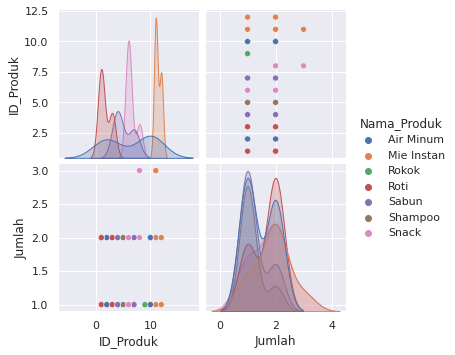

In [21]:
g = sns.pairplot(df, hue="Nama_Produk")

Kita mendapatkan gambaran umum dari data sehingga terlihat bahwa penjualan terbanyak di **AlfaIndo** yaitu Snack, Air Minum, dan mie instan. 

In [22]:
numerik = ['ID_Produk', 'Jumlah']

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: callable
  facecolor: color
  fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  sna

<Figure size 432x288 with 0 Axes>

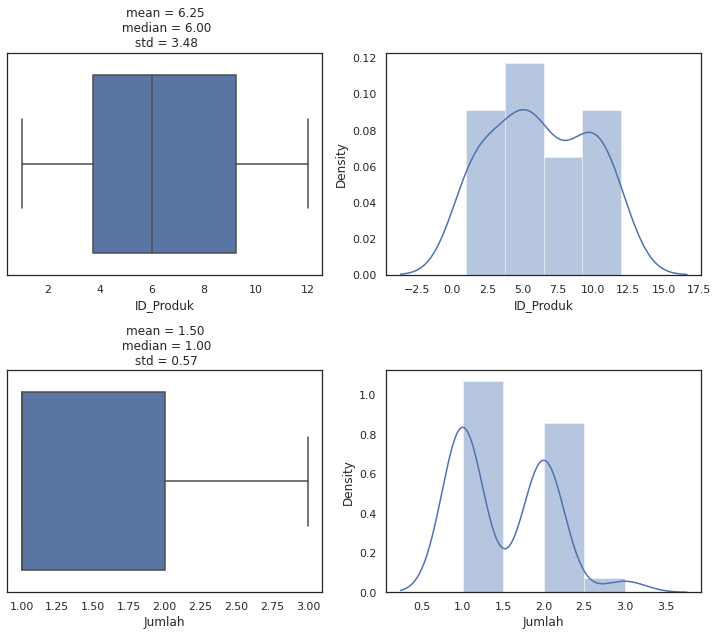

In [23]:
sns.set(style='white')
plt.clf()
  
# Fungsi untuk membuat plot  
def obser_num(features):  
    fig, axs = plt.subplots(2, 2, figsize=(10, 9))
    for i, kol in enumerate(features):
	    p1=sns.boxplot(df[kol], ax = axs[i][0])
	    p2=sns.distplot(df[kol], ax = axs[i][1])   
	    axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(df[kol].mean(), df[kol].median(), df[kol].std()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show()  
  
# Memanggil fungsi untuk membuat Plot untuk data numerik  
obser_num(numerik)

Terlihat bahwa rata-rata pembelian AlfaIndo adalah 1. Dengan jumlah pembelian terbanyak sebanyak 3 produk.

In [24]:
kategorik = [ 'Konsumen','Nama_Produk','Merek']

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: callable
  facecolor: color
  fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  sna

<Figure size 432x288 with 0 Axes>

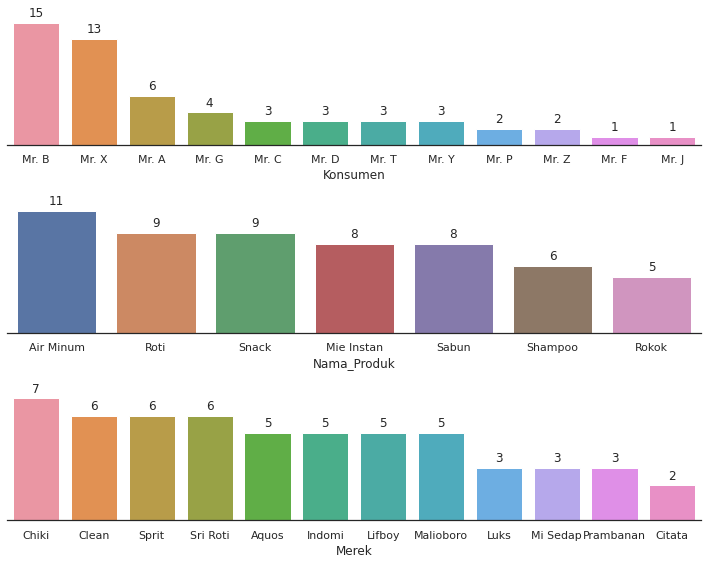

In [25]:
sns.set(style='white')
plt.clf()

# Membuat canvas
fig, axs = plt.subplots(3,1,figsize=(10, 8)) 

# Membuat plot untuk setiap kolom kategorikal  
for i, kol2 in enumerate(kategorik):  
    # Membuat Plot
    sns.countplot(df[kol2], order = df[kol2].value_counts().index, ax = axs[i])  
    
      
    # Memberikan anotasi  
    for p in axs[i].patches:  
        axs[i].annotate(format(p.get_height(), '.0f'),  
                        (p.get_x() + p.get_width() / 2., p.get_height()),  
                        ha = 'center',  
                        va = 'center',  
                        xytext = (0, 10),  
                        textcoords = 'offset points') 
          
    # Setting Plot  
    sns.despine(right=True,top = True, left = True)  
    axs[i].axes.yaxis.set_visible(False) 
    plt.setp(axs)
    plt.tight_layout()

# Tampilkan plot
plt.show()

Dapat kita lihat bahwa Mr. B merupakan konsumen yang sering mengunjungi AlfaIndo. Untuk mengapresiasi pengunjungan tersering kami memberikan poin yang dapat ditukarkan dengan sebuah voucher belanja atau hadiah lainnya. Dengan begitu, konsumen yang jarang mengunjungi akan tertarik untuk mengunjungi AlfaIndo.

Terlihat bahwa posisi pertama terdapat produk Air Mineral yang lebih banyak dipilih oleh konsumen, kemudian produk Roti dan Snack menjadi posisi kedua yang dipilih konsumen juga. Karena produk Sabun dan Shampoo penjualannya kurang diminati, oleh karena itu kami menyarankan untuk kedua produk tersebut di bundling dan diberikan promo.

Konsumen lebih banyak memilih merek produk Chiki sedangkan untuk merek produk citata konsumen kurang meminati. Karena kedua produk tersebut merupakan sama-sama Snack kami menyarankan untuk kedua produk tersebut diletakkan di rak yang bersebelahan agar konsumen yang memilih merek produk Chiki juga tertarik untuk memilih merek produk Citata.

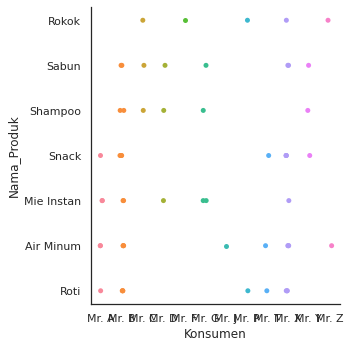

In [26]:
a = sns.catplot(x="Konsumen", y="Nama_Produk", data=df)

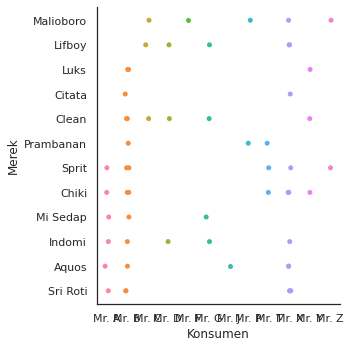

In [27]:
a = sns.catplot(x="Konsumen", y="Merek", data=df)

## Association Rules

In [28]:
filter_ = {'pls', 'plas'}
for f in filter_:
    df = df[~df['ID_Transaksi'].str.contains(f)] # filtering invoice

In [29]:
print(set(df['ID_Transaksi']))

{'6', '16', '11', '12', '13', '7', '9', '17', '10', '3', '1', '14', '8', '18', '2', '4', '5', '15'}


In [30]:
df_A = df[df['Konsumen'] =="Mr. B"]
df_A.head()

,ID_Transaksi,Tanggal,Konsumen,ID_Produk,Nama_Produk,Merek,Jumlah
4,2,2022-07-01,Mr. B,2,Air Minum,Aquos,1
5,2,2022-07-01,Mr. B,6,Snack,Chiki,2
6,2,2022-07-01,Mr. B,3,Roti,Prambanan,1
7,2,2022-07-01,Mr. B,5,Shampoo,Clean,1
11,4,2022-07-02,Mr. B,1,Roti,Sri Roti,2


In [31]:
basket = df[df['Konsumen'] =="Mr. B"]
basket.head()

,ID_Transaksi,Tanggal,Konsumen,ID_Produk,Nama_Produk,Merek,Jumlah
4,2,2022-07-01,Mr. B,2,Air Minum,Aquos,1
5,2,2022-07-01,Mr. B,6,Snack,Chiki,2
6,2,2022-07-01,Mr. B,3,Roti,Prambanan,1
7,2,2022-07-01,Mr. B,5,Shampoo,Clean,1
11,4,2022-07-02,Mr. B,1,Roti,Sri Roti,2


In [32]:
# Group the transaction
basket = basket.groupby(['ID_Transaksi', 'Nama_Produk'])['Jumlah']
basket.head()

4     1
5     2
6     1
7     1
11    2
12    2
13    3
14    1
15    2
23    1
24    1
25    1
26    3
54    2
55    2
Name: Jumlah, dtype: int64

In [33]:
basket = basket.sum().unstack().reset_index().fillna(0).set_index('ID_Transaksi')
basket.head()

Nama_Produk,Air Minum,Mie Instan,Rokok,Roti,Sabun,Shampoo,Snack
ID_Transaksi,,,,,,,
18,2,0,0,2,0,0,0
2,1,0,0,1,0,1,2
4,2,2,0,2,1,0,3
8,0,3,0,0,1,1,1


In [34]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units) # one-hot encoding
basket_sets.head()

Nama_Produk,Air Minum,Mie Instan,Rokok,Roti,Sabun,Shampoo,Snack
ID_Transaksi,,,,,,,
18,1,0,0,1,0,0,0
2,1,0,0,1,0,1,1
4,1,1,0,1,1,0,1
8,0,1,0,0,1,1,1


In [35]:
basket_sets.columns

Index(['Air Minum', 'Mie Instan', 'Rokok', 'Roti', 'Sabun', 'Shampoo',
       'Snack'],
      dtype='object', name='Nama_Produk')

In [36]:
basket_sets.index

Index(['18', '2', '4', '8'], dtype='object', name='ID_Transaksi')

In [37]:
basket_sets.iloc[0]

Nama_Produk
Air Minum     1
Mie Instan    0
Rokok         0
Roti          1
Sabun         0
Shampoo       0
Snack         0
Name: 18, dtype: int64

In [38]:
basket_sets.iloc[0].sum()

2

In [39]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False, na_position='last', inplace = True)
frequent_itemsets

,support,itemsets
0,0.75,(Air Minum)
2,0.75,(Roti)
5,0.75,(Snack)
7,0.75,"(Roti, Air Minum)"
12,0.50,"(Mie Instan, Sabun)"
26,0.50,"(Snack, Roti, Air Minum)"
32,0.50,"(Mie Instan, Sabun, Snack)"
1,0.50,(Mie Instan)
20,0.50,"(Snack, Shampoo)"
19,0.50,"(Sabun, Snack)"


In [40]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values(by='lift', ascending=False, na_position='last', inplace = True)
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
115,"(Sabun, Air Minum)","(Mie Instan, Roti)",0.25,0.25,0.25,1.0,4.0,0.1875,inf
178,"(Air Minum, Sabun, Snack)","(Mie Instan, Roti)",0.25,0.25,0.25,1.0,4.0,0.1875,inf
177,"(Roti, Sabun, Snack)","(Mie Instan, Air Minum)",0.25,0.25,0.25,1.0,4.0,0.1875,inf
114,"(Mie Instan, Air Minum)","(Roti, Sabun)",0.25,0.25,0.25,1.0,4.0,0.1875,inf
113,"(Roti, Sabun)","(Mie Instan, Air Minum)",0.25,0.25,0.25,1.0,4.0,0.1875,inf


Terlihat bahwa konsumen yang membeli produk Sabun dan Roti kemungkinan juga membeli Mie instan dan Air Minum. 

konsumen yang membeli Mie Instan, Roti, dan Snack kemungkinan juga membeli Sabun dan Air Minum

konsumen yang membeli Mie Instan dan Roti kemungkinan juga membeli Sabun, Air Minum, Snack

konsumen yang membeli Sabun, Roti, dan Snack kemungkinan juga membeli Mie Instan dan AIr Minum

Konsumen yang membeli Sabun dan Air Minum kemungkinan juga membeli Mie Instan, Roti, dan Snack


In [41]:
# Filtering
rules[ (rules['lift'] >= 0) & (rules['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
115,"(Sabun, Air Minum)","(Mie Instan, Roti)",0.25,0.25,0.25,1.0,4.000000,0.1875,inf
178,"(Air Minum, Sabun, Snack)","(Mie Instan, Roti)",0.25,0.25,0.25,1.0,4.000000,0.1875,inf
177,"(Roti, Sabun, Snack)","(Mie Instan, Air Minum)",0.25,0.25,0.25,1.0,4.000000,0.1875,inf
114,"(Mie Instan, Air Minum)","(Roti, Sabun)",0.25,0.25,0.25,1.0,4.000000,0.1875,inf
113,"(Roti, Sabun)","(Mie Instan, Air Minum)",0.25,0.25,0.25,1.0,4.000000,0.1875,inf
...,...,...,...,...,...,...,...,...,...
80,"(Mie Instan, Sabun, Air Minum)",(Snack),0.25,0.75,0.25,1.0,1.333333,0.0625,inf
92,"(Air Minum, Shampoo, Snack)",(Roti),0.25,0.75,0.25,1.0,1.333333,0.0625,inf
1,(Air Minum),(Roti),0.75,0.75,0.75,1.0,1.333333,0.1875,inf
104,"(Sabun, Shampoo)",(Snack),0.25,0.75,0.25,1.0,1.333333,0.0625,inf


Terlihat bahwa jika Konsumen membeli sabun dan roti pasti akan membeli Mie Instan dan Air Minum dan begitu pun sebaliknya

## Kesimpulan dan Saran

In [42]:
rules_tran=pd.DataFrame(rules[['antecedents','consequents','lift','confidence','support']])
#filter top rules
top_rules_fr=rules_tran.groupby(['antecedents', 'consequents']).first().reset_index().sort_values(['support', 'confidence', 'lift'],ascending=False).head()
top_rules_fr


,antecedents,consequents,lift,confidence,support
19,(Air Minum),(Roti),1.333333,1.0,0.75
49,(Roti),(Air Minum),1.333333,1.0,0.75
0,(Sabun),(Mie Instan),2.000000,1.0,0.50
9,(Sabun),"(Mie Instan, Snack)",2.000000,1.0,0.50
112,(Mie Instan),(Sabun),2.000000,1.0,0.50


Dari output di atas dapat di lihat 5 pembelian terbanyak terdapat pada produk roti dan kemungkinan apabila konsumen membeli roti pasti akan membeli air minum (dan begitu pun sebaliknya) maka kami merekomendasikan untuk meletakan produk roti dekat dengan rak air minum.

apabila konsumen membeli sabun pasti konsumen juga akan membeli Mie instan (dan begitu pun sebaliknya)

apabila konsumen membeli snack pasti konsumen juga akan membeli mie instan (dan begitu pun sebaliknya) maka kami merekomendasikan agar meletakan snack dekat dengan mie instan

Text(0.5, 1.0, '12 Merek Dengan Penjualan Terbanyak')

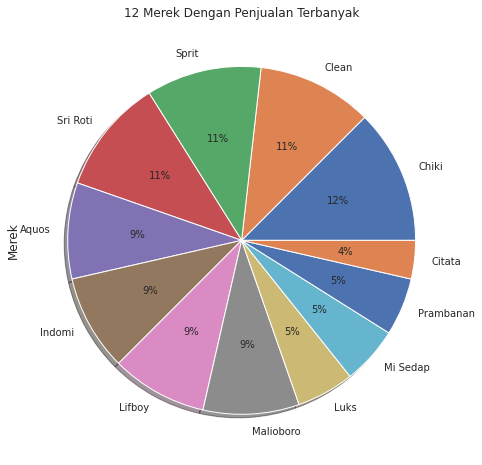

In [43]:
merek = df.groupby(df['Merek'])['Merek'].count().sort_values(ascending = False).head(12)
plt.figure(figsize=(12,8))
plt.subplot()
merek.plot.pie(autopct = '%1.f%%', shadow = True, fontsize = 10)
plt.title("12 Merek Dengan Penjualan Terbanyak")

Terlihat bahwa penjualan dengan konsumen terbanyak ada pada produk snack chiki dan penjualan terendah yaitu produk snack citata. Untuk itu kami merekomendasikan agar memberikan promo pada snack citata yaitu buy 1 get 1 dan menempatkan produk snack citata di rak paling depan.


Pada penjualan produk Luks memiliki sedikit peminat maka kami merekomendasikan untuk melakukan bundling pada produk Clean dan Luks, karena seperti yang kita tahu bahwa produk Clean dan Luks berada pada satu perusahaan yang sama sehingga kedua produk itu bisa dikelompokkan dan di jual dengan satu harga.


Pada penjualan produk roti prambanan memiliki sedikit peminat untuk konsumen membeli untuk itu kami merekomendasikan agar produk tersebut pada rak kasir dan memberikan promo (misalnya: 15.000 dapat 2 atau tebus murah dengan minimum pembelian tertentu). 


Pada penjualan produk produk mie instan 'mi sedap' juga memiliki sedikit peminat dibaningan produk 'indomi'. Untuk itu kami merekomendasikan agar produk 'mi sedap' diberikan promo yaitu 10.000 dapat 4.

# Saran

Kami menyarankan agar rak makanan ringan dan minuman sebaiknya diletakan di tempat yang dekat dengan rak yang lainnya (yang sedikit penjualannya) agar konsumen bisa melihat produk tersebut.

atau bisa juga produk yang penjualannya terlaris dapat diletakkan di rak paling belakang agar konsumen dapat melihat rak terdepan atau rak yang berisi produk lain yang peminatnya kurang.

Dan menyediakan layanan pesan antar agar konsumen(anak kos) dapat terus membeli produk yang ada di AlfaIndo.

Memberikan promo pada Roti Prambanan, Sabun Luks, dan ciki Citata awal bulan karena konsumen biasanya mendapatkan uang di awal bulan atau juga bisa sebagai gift dari barang lainnya.
